26


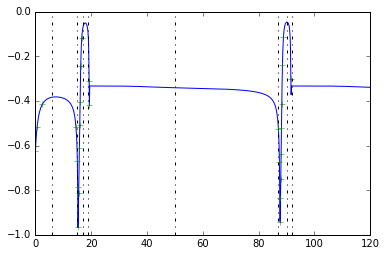

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import Example1
from timevarying_covar import time_discretisation_handler

odeModel = Example1.nonlinearFrictionODE()


dim = 2
initCond = [0., 0.5, 0.8]
tt = np.linspace(0., 120, 1000)

sol = odeModel.solve(initCond, tt)

eigVal = []
for i in range(tt.size):
    A = odeModel.dXdt_Jac(sol[i,:2])
    la, UA = np.linalg.eig(A)
    eigVal.append(la)
eigVal = np.array(eigVal)

tk = np.array([6, 15, 17, 19, 50, 87, 90, 92, 120])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tt, np.real(eigVal[:,0]))
#ax.plot(tt, np.real(eigVal[:,1]))

for t in tk:
    ax.plot([t, t], [-1. , 0.], 'k-.')

changePoints = 0.
eCur = max(np.real(eigVal[0,]))

TT = [0.]
LL = [eCur]

for i in range(tt.size):
    e = max(np.real(eigVal[i,]))
    if abs(e - eCur) > 0.1:
        TT.append(tt[i])
        LL.append(e)
        eCur = e

print len(LL)
ax.plot(TT, LL, '+')
plt.show()
